In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [57]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [59]:
num_classes = 10  # количество классов для Fashion MNIST

if len(train_labels.shape) != 2 or train_labels.shape[-1] != num_classes:
    train_labels = to_categorical(train_labels, num_classes=num_classes)

if len(test_labels.shape) != 2 or test_labels.shape[-1] != num_classes:
    test_labels = to_categorical(test_labels, num_classes=num_classes)

In [61]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [63]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [64]:
epochs = 20
batch_size = 64

In [65]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 55s 58ms/step - loss: 0.7027 - categorical_accuracy: 0.7474 - val_loss: 0.4302 - val_categorical_accuracy: 0.8332
Epoch 2/20
938/938 [==============================] - 55s 59ms/step - loss: 0.4477 - categorical_accuracy: 0.8398 - val_loss: 0.3545 - val_categorical_accuracy: 0.8691
Epoch 3/20
938/938 [==============================] - 55s 58ms/step - loss: 0.3849 - categorical_accuracy: 0.8633 - val_loss: 0.3255 - val_categorical_accuracy: 0.8868
Epoch 4/20
938/938 [==============================] - 55s 59ms/step - loss: 0.3468 - categorical_accuracy: 0.8786 - val_loss: 0.3029 - val_categorical_accuracy: 0.8898
Epoch 5/20
938/938 [==============================] - 55s 59ms/step - loss: 0.3207 - categorical_accuracy: 0.8881 - val_loss: 0.2946 - val_categorical_accuracy: 0.8969
Epoch 6/20
938/938 [==============================] - 52s 56ms/step - loss: 0.2985 - categorical_accuracy: 0.8949 - val_loss: 0.2839 - val_categorical_accuracy:

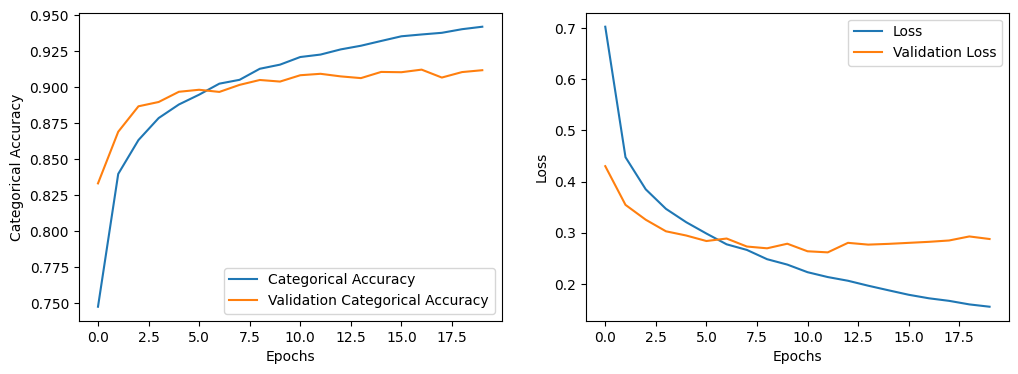

In [68]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 108ms/step


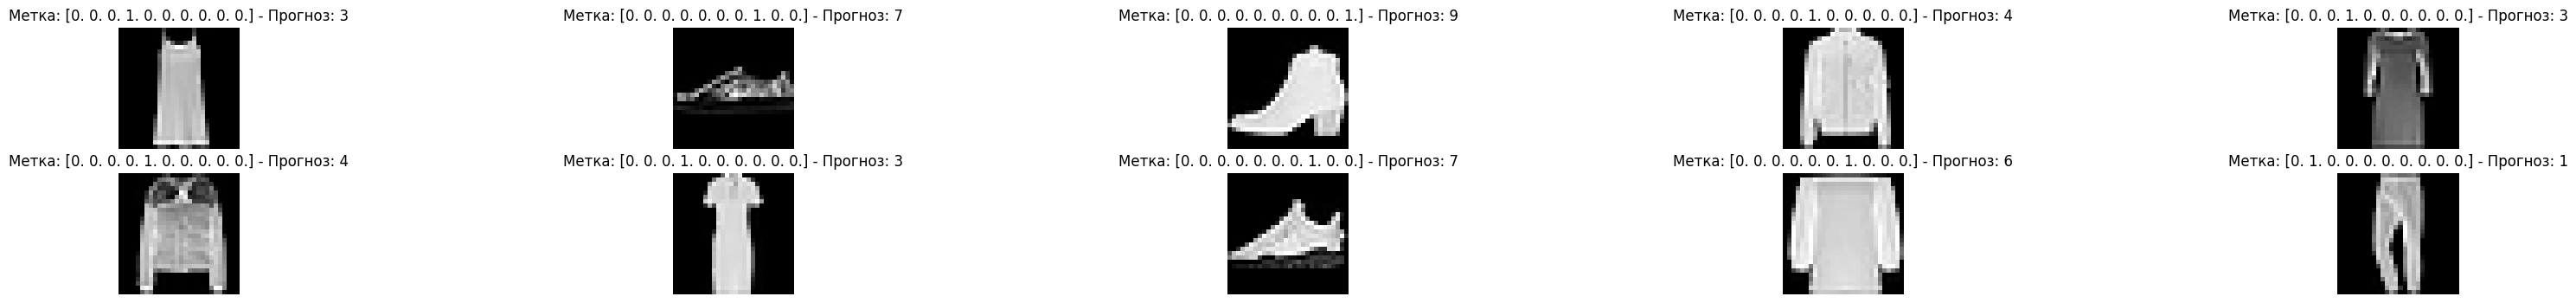

In [71]:
random_indices = np.random.randint(0, len(test_images), size=10)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(40, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f'Метка: {random_labels[i]} - Прогноз: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()


Можна зробити наступний висновок:

Нейронна мережа, яка створена з допомогою Keras, показала досить хорошу точність.

В кінці 20 епох навчання точність на навчальних даних (train accuracy) складає близько 94.57%

Точність на валідаційних даних (val_accuracy) досягла близько 91.19% на останній епохі.
